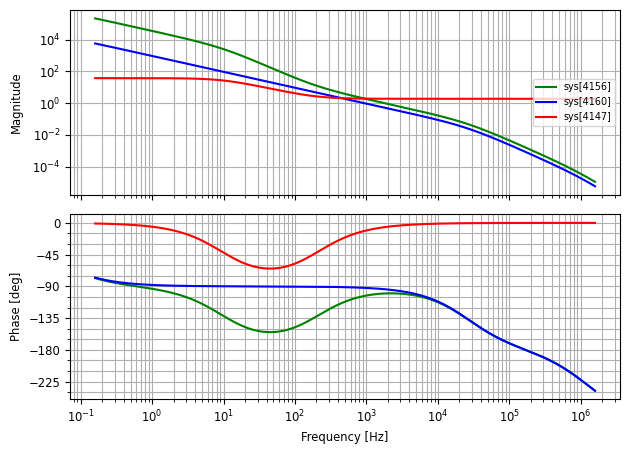

In [223]:
import control as co
import numpy as np

V_IN, V_OUT = 5, 170
N_PS = 1 / 10
D = N_PS * V_OUT / (V_IN + N_PS * V_OUT)
D_PRIME = 1 - D
L = 10e-6
R_LOAD, C_OUT = 1700e+3, 4.7e-6
V_REF = 1.26
f_SW = 350e+3
T_SW = 1 / f_SW
R_FB1 = 330e+3
R_FB2 = R_FB1 * V_REF / (V_OUT - V_REF)

R_s = 0.006
V_SL = 92e-3
S_n, S_f, S_e = V_IN / L, N_PS * V_OUT / L, V_SL * f_SW / R_s

g_m, A_ea_vol = 800e-6, 38
R_ea_o = A_ea_vol / g_m
f_p2, f_z3 = 10, 200
C_c1 = 1 / (R_ea_o * 2 * np.pi * f_p2)
R_c1 = 1 / (2 * np.pi * f_z3 * C_c1)
A_ea = g_m * R_ea_o

F_m = 1 / (R_s * (S_n + S_e) * T_SW)
G_di = co.tf([(S_n + S_f)], [1, 0])
H_e = co.tf([1 / ((np.pi * f_SW) ** 2), -1 / (2 * f_SW), 1], [1])

G_ivo = N_PS * co.tf([-V_OUT * L / (V_IN * R_LOAD * D_PRIME * N_PS), 1], [C_OUT / D_PRIME, 1 / (D_PRIME * R_LOAD) + N_PS * V_OUT / (V_IN * R_LOAD)])

G_div = R_FB2 / (R_FB1 + R_FB2)

G_fb = A_ea * co.tf([1 / (2 * np.pi * f_z3), 1], [1 / (2 * np.pi * f_p2), 1])

G_inner_loop = co.feedback(F_m * G_di, R_s * H_e)

G_overall_loop = G_inner_loop * G_ivo * G_div * G_fb

co.bode(G_overall_loop, np.logspace(0, 7, 1000), Hz=True, color='green')
co.bode(G_inner_loop * G_ivo * G_div, np.logspace(0, 7, 1000), Hz=True, color='blue')
co.bode(G_fb, np.logspace(0, 7, 1000), Hz=True, color='red')


In [224]:
print(D)


0.7727272727272727


In [225]:
print(R_FB2 / (R_FB1 + R_FB2) * V_OUT)


1.2599999999999998


In [226]:
print(R_FB1, R_FB2)


330000.0 2464.146023468057


In [227]:
print(S_n, S_f, S_e)
print((S_f - S_e) / (S_n + S_e))


499999.99999999994 1699999.9999999998 5366666.666666667
-0.625


In [228]:
R_FA = 4.503 * 10 ** 11 * f_SW ** -1.26

print(R_FA)


46556.05912734094


In [229]:
print(R_c1, C_c1)

2375.0 3.350630380882007e-07


In [230]:
delta_i_p = V_IN / L * D * T_SW
delta_i_s = delta_i_p * N_PS
delta_v_o = V_OUT / (R_LOAD * C_OUT) * D * T_SW
i_L = V_OUT / (N_PS * D_PRIME * R_LOAD)

print(delta_i_p, delta_v_o, i_L)


1.1038961038961037 4.697430229345123e-05 0.0043999999999999985


In [231]:
print(G_v)

NameError: name 'G_v' is not defined